In [1]:
import pandas as pd
import numpy as np
import time
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/E-commerce/Eco-churn-clean.xlsx')

# **Data preprocessing**

In [4]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_ml = df.copy()
for col in df_ml.columns:
  if df_ml[col].dtype == 'object':
    df_ml[col] = label_encoder.fit_transform(df_ml[col])


In [ ]:
df_ml.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4,1,3,6,2,0,3,3,2,2,2,9,1,11,1,1,5,159.93
1,1,9,2,1,8,4,1,3,4,3,3,2,7,1,15,0,1,0,120.90
2,1,9,2,1,30,2,1,2,4,3,3,2,6,1,14,0,1,3,120.28
3,1,0,2,3,15,2,1,2,4,2,5,2,8,0,23,0,1,3,134.07
4,1,0,2,1,12,0,1,3,3,3,5,2,3,0,11,1,1,3,129.60


**Split the dataset into train and test**

In [5]:
X = df_ml.drop('Churn',axis=1)
X

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4,1,3,6,2,0,3,3,2,2,2,9,1,11,1,1,5,159.93
1,9,2,1,8,4,1,3,4,3,3,2,7,1,15,0,1,0,120.90
2,9,2,1,30,2,1,2,4,3,3,2,6,1,14,0,1,3,120.28
3,0,2,3,15,2,1,2,4,2,5,2,8,0,23,0,1,3,134.07
4,0,2,1,12,0,1,3,3,3,5,2,3,0,11,1,1,3,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10,0,1,30,0,1,3,2,2,1,1,6,0,18,1,2,4,150.71
5626,13,1,1,13,0,1,3,5,0,5,1,6,0,16,1,2,3,224.91
5627,1,1,1,11,2,1,3,2,2,4,1,3,1,21,1,2,4,186.42
5628,23,0,3,9,0,1,4,5,2,4,1,4,0,15,2,2,9,178.90


In [6]:
y = df_ml['Churn']
y

0       1
1       1
2       1
3       1
4       1
       ..
5625    0
5626    0
5627    0
5628    0
5629    0
Name: Churn, Length: 5630, dtype: int64

In [7]:
#Train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Build and evaluate models**

**Create a function to evaluate the model**

In [8]:
def EvaluateModel(model, y_test, y_pred=None, plot=False):

    if y_pred is None:
        y_pred = model.predict(X_test)

    # Confusion matrix
    confusion = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

    # Training time start
    start_time = time.time()

    # visualize Confusion Matrix
    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Training time end

    end_time = time.time()
    training_time = end_time - start_time

    print('Training Time:', training_time, 'seconds')

    # Classification Accuracy:
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Classification Accuracy:', accuracy)

    # Classification Error:
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred))

    # Classification Report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))


**Decision tree**

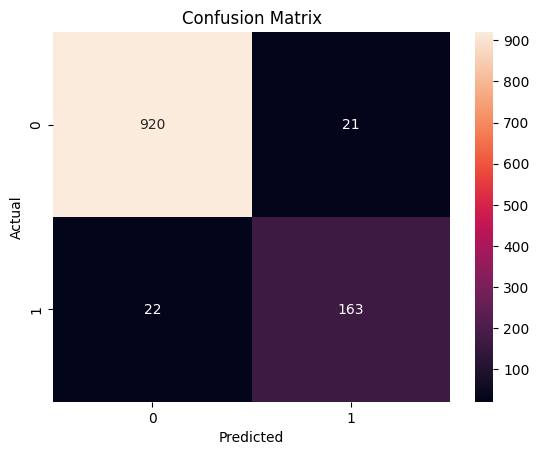

Training Time: 0.24320101737976074 seconds
Classification Accuracy: 0.9618117229129662
Classification Error: 0.03818827708703376
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       941
           1       0.89      0.88      0.88       185

    accuracy                           0.96      1126
   macro avg       0.93      0.93      0.93      1126
weighted avg       0.96      0.96      0.96      1126



In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf_model = clf.fit(X_train,y_train)
EvaluateModel(clf, y_test, plot=False)

The accuracy is quite high, but this is an an imbalanced dataset, so it's not important.

I used Confusion Matrix, then check precision, recall and f1-score for each class. These indexs is very high for class 0 and even though this is an imbalanced data set, they are not too low for class 1.

Try using SMOTEENN to increase the number of samples of the minority class - class 1, then Check the model again

In [9]:
#Resample
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [10]:
#Split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [29]:
model_clf = clf.fit(Xr_train,yr_train)
start_time = time.time()
yr_pred = clf.predict(Xr_test)
clf_score = accuracy_score(yr_test, yr_pred)
end_time = time.time()
training_time = end_time - start_time
print('Training time:', training_time)
print('Score:', clf_score)
print(classification_report(yr_test, yr_pred))

Training time: 0.005179166793823242
Score: 0.9663865546218487
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       722
           1       0.96      0.98      0.97       944

    accuracy                           0.97      1666
   macro avg       0.97      0.96      0.97      1666
weighted avg       0.97      0.97      0.97      1666



Now we can see the better result, very good precision,recall, f1-score in both classes.

Let's try with some other classifier.

**Random Forest**

*Use resample data*

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
start_time = time.time()
model_rf = rf.fit(Xr_train,yr_train)
yr_pred = rf.predict(Xr_test)
rf_score = accuracy_score(yr_test, yr_pred)
end_time = time.time()
training_time = end_time - start_time
print('Training time:', training_time)
print('Accuracy score:', rf_score)
print(classification_report(yr_test, yr_pred))

Training time: 0.8527233600616455
Accuracy score: 0.9843937575030012
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       722
           1       0.98      0.99      0.99       944

    accuracy                           0.98      1666
   macro avg       0.98      0.98      0.98      1666
weighted avg       0.98      0.98      0.98      1666



**K-Nearest Neighbor (KNN)**

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
start_time = time.time()
model_knn = knn.fit(Xr_train, yr_train)
yr_pred = knn.predict(Xr_test)
knn_score = accuracy_score(yr_test, yr_pred)
end_time = time.time()
training_time = end_time - start_time
print('Training time:', training_time)
print('Score:', knn_score)
print(classification_report(yr_test, yr_pred))

Training time: 0.16744756698608398
Score: 0.9705882352941176
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       722
           1       0.95      1.00      0.97       944

    accuracy                           0.97      1666
   macro avg       0.98      0.97      0.97      1666
weighted avg       0.97      0.97      0.97      1666



**Support Vector Machine (SVM)**

In [32]:
from sklearn.svm import SVC
svc = SVC()
start_time = time.time()
model_svc = svc.fit(Xr_train, yr_train)
yr_pred = svc.predict(Xr_test)
svc_score = accuracy_score(yr_test,yr_pred)
end_time = time.time()
training_time = end_time - start_time
print('Training time:', training_time)
print('Score:', svc_score)
print(classification_report(yr_test, yr_pred))

Training time: 4.939926862716675
Score: 0.7683073229291717
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       722
           1       0.77      0.83      0.80       944

    accuracy                           0.77      1666
   macro avg       0.77      0.76      0.76      1666
weighted avg       0.77      0.77      0.77      1666



# **Conclusion**



*   Random Forest Classifier is the best model with the highest accuracy score, good precision, recall and f1-score in both classes.
*   KNN is also a good model, with shorter training time than Random Forest Classifier model.
